# Data Exploration



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sample_20 = pd.read_csv('/content/drive/MyDrive/Datasets/train_merged_05.csv')

In [ ]:
sample_20.head(5)

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2017-03-11,0.374606,0.033519,0.044293,1.008622,0.001470,0.459235,0.002339,0.006168,...,NaN,NaN,0.008263,0.006609,0.007370,NaN,0.007171,0.005120,0.007513,0
1,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2017-04-22,0.414269,0.002516,0.059667,0.123964,0.004374,0.434148,0.001405,0.052130,...,NaN,NaN,0.001986,0.004050,0.000796,NaN,0.001802,0.002364,0.003987,0
2,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2017-05-12,0.413310,0.003285,0.053418,0.304955,0.002316,0.415906,0.009388,0.048780,...,NaN,NaN,0.009515,0.008757,0.009219,NaN,0.003134,0.001686,0.001265,0
3,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2017-06-10,0.328983,0.038574,0.049463,0.115654,0.004654,0.416112,0.003223,0.081001,...,NaN,NaN,0.002524,0.007841,0.007421,NaN,0.000728,0.003591,0.007998,0
4,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2017-07-19,0.496989,0.005552,0.041452,0.133631,0.007363,0.419864,0.003393,0.098308,...,NaN,NaN,0.003823,0.009599,0.006957,NaN,0.008746,0.007101,0.006658,0


In [ ]:
sample_20.shape

(277266, 191)

In [ ]:
sample_20['customer_ID'].nunique()

22946

In [ ]:
sample_20.dtypes

customer_ID     object
S_2             object
P_2            float64
D_39           float64
B_1            float64
                ...   
D_142          float64
D_143          float64
D_144          float64
D_145          float64
target           int64
Length: 191, dtype: object

## Store Data Types

In [ ]:
sample_data_types = pd.DataFrame(sample_20.dtypes)
sample_data_types.to_csv('/content/drive/MyDrive/Datasets/train_data_types.csv')

3 Features are objects

In [ ]:
sample_20.dtypes[sample_20.dtypes == "object"]

customer_ID    object
S_2            object
D_63           object
D_64           object
dtype: object

In [ ]:
sample_20['D_63'].unique()

array(['CO', 'CR', 'CL', 'XL', 'XM', 'XZ'], dtype=object)

## One Hot Encoding

### Sample Data Encoding

In [ ]:
categorical_variables = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = OneHotEncoder(sparse = False)

In [ ]:
encoded_data = enc.fit_transform(sample_20[categorical_variables])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
sample_encoded = pd.DataFrame(encoded_data, columns = enc.get_feature_names_out(categorical_variables))

sample_encoded.shape

(277266, 55)

In [ ]:
sample_encoded.head

<bound method NDFrame.head of         B_30_0.0  B_30_1.0  B_30_2.0  B_30_nan  B_38_1.0  B_38_2.0  B_38_3.0  \
0            1.0       0.0       0.0       0.0       1.0       0.0       0.0   
1            1.0       0.0       0.0       0.0       1.0       0.0       0.0   
2            1.0       0.0       0.0       0.0       1.0       0.0       0.0   
3            1.0       0.0       0.0       0.0       1.0       0.0       0.0   
4            1.0       0.0       0.0       0.0       1.0       0.0       0.0   
...          ...       ...       ...       ...       ...       ...       ...   
277261       0.0       1.0       0.0       0.0       0.0       0.0       0.0   
277262       0.0       1.0       0.0       0.0       0.0       0.0       0.0   
277263       0.0       1.0       0.0       0.0       0.0       0.0       0.0   
277264       1.0       0.0       0.0       0.0       0.0       0.0       0.0   
277265       1.0       0.0       0.0       0.0       0.0       0.0       0.0   

        B

In [ ]:
sample_20 = sample_20.join(sample_encoded)

In [ ]:
sample_20['B_30_0.0'].head(5)

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: B_30_0.0, dtype: float64

In [ ]:
sample_20.drop(['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68'], axis=1, inplace=True)

In [ ]:
sample_20.shape

(277266, 235)

#Feature Engineering



In [ ]:
sample_20 = sample_20.set_index('S_2')
sample_20.head()

,customer_ID,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_66_1.0,D_66_nan,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0,D_68_nan
S_2,,,,,,,,,,,,,,,,,,,,,
2017-03-11,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.374606,0.033519,0.044293,1.008622,0.001470,0.459235,0.002339,0.006168,0.152932,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2017-04-22,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.414269,0.002516,0.059667,0.123964,0.004374,0.434148,0.001405,0.052130,0.154147,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2017-05-12,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.413310,0.003285,0.053418,0.304955,0.002316,0.415906,0.009388,0.048780,0.150513,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2017-06-10,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.328983,0.038574,0.049463,0.115654,0.004654,0.416112,0.003223,0.081001,0.148605,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2017-07-19,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.496989,0.005552,0.041452,0.133631,0.007363,0.419864,0.003393,0.098308,0.147616,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
sample_20 = sample_20.sort_values(by=['customer_ID', 'S_2'])
sample_20.head()

,customer_ID,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_66_1.0,D_66_nan,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0,D_68_nan
S_2,,,,,,,,,,,,,,,,,,,,,
2017-03-11,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.374606,0.033519,0.044293,1.008622,0.001470,0.459235,0.002339,0.006168,0.152932,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2017-04-22,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.414269,0.002516,0.059667,0.123964,0.004374,0.434148,0.001405,0.052130,0.154147,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2017-05-12,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.413310,0.003285,0.053418,0.304955,0.002316,0.415906,0.009388,0.048780,0.150513,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2017-06-10,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.328983,0.038574,0.049463,0.115654,0.004654,0.416112,0.003223,0.081001,0.148605,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2017-07-19,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.496989,0.005552,0.041452,0.133631,0.007363,0.419864,0.003393,0.098308,0.147616,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


6 month rolling avg

In [ ]:
sample_20 = sample_20.reset_index()
list_of_agg_features = ['P_2','B_1','D_44','B_2']
list_of_agg_features_6mo_avg = ['P_2_6mo_avg','B_1_6mo_avg','D_44_6mo_avg','B_2_6mo_avg']
sample_20[list_of_agg_features_6mo_avg] = sample_20.groupby('customer_ID').rolling(6)[list_of_agg_features].mean().reset_index(drop=True)
sample_20.head(5)

,S_2,customer_ID,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0,D_68_nan,P_2_6mo_avg,B_1_6mo_avg,D_44_6mo_avg,B_2_6mo_avg
0,2017-03-11,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.374606,0.033519,0.044293,1.008622,0.001470,0.459235,0.002339,0.006168,...,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN
1,2017-04-22,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.414269,0.002516,0.059667,0.123964,0.004374,0.434148,0.001405,0.052130,...,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN
2,2017-05-12,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.413310,0.003285,0.053418,0.304955,0.002316,0.415906,0.009388,0.048780,...,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,2017-06-10,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.328983,0.038574,0.049463,0.115654,0.004654,0.416112,0.003223,0.081001,...,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2017-07-19,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.496989,0.005552,0.041452,0.133631,0.007363,0.419864,0.003393,0.098308,...,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
5,2017-08-09,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.498521,0.001718,0.061001,0.132639,0.005684,0.258999,0.004656,0.095534,...,1.0,0.0,0.0,0.0,0.0,0.0,0.421113,0.051549,0.005639,0.303244
6,2017-09-06,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.529242,0.000509,0.092461,0.143985,0.004878,0.314201,0.006452,0.124453,...,1.0,0.0,0.0,0.0,0.0,0.0,0.446886,0.059577,0.005412,0.159138
7,2017-10-15,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.560474,0.001538,0.090844,0.046120,0.006817,0.302323,0.006669,0.217704,...,1.0,0.0,0.0,0.0,0.0,0.0,0.471253,0.064773,0.004524,0.146164
8,2017-11-10,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.407172,0.001548,0.106145,0.048557,0.001353,0.330037,0.009187,0.223204,...,1.0,0.0,0.0,0.0,0.0,0.0,0.470230,0.073561,0.005123,0.103431
9,2017-12-19,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.412912,0.003498,0.112638,0.057964,0.000030,0.367211,0.006090,0.174232,...,0.0,1.0,0.0,0.0,0.0,0.0,0.484218,0.084090,0.005528,0.093816


3month avg

In [ ]:
list_of_agg_features_3mo_avg = ['P_2_3mo_avg','B_1_3mo_avg','D_44_3mo_avg','B_2_3mo_avg']
sample_20[list_of_agg_features_3mo_avg] = sample_20.groupby('customer_ID').rolling(3)[list_of_agg_features].mean().reset_index(drop=True)

In [ ]:
sample_20.shape

(277266, 243)

In [ ]:
list_of_agg_features_latest = ['P_2_latest','B_1_latest','D_44_latest','B_2_latest']
sample_20[list_of_agg_features_latest] = sample_20.groupby('customer_ID')[list_of_agg_features].last().reset_index(drop=True)

In [ ]:
sample_20.head()

,S_2,customer_ID,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_44_6mo_avg,B_2_6mo_avg,P_2_3mo_avg,B_1_3mo_avg,D_44_3mo_avg,B_2_3mo_avg,P_2_latest,B_1_latest,D_44_latest,B_2_latest
0,2017-03-11,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.374606,0.033519,0.044293,1.008622,0.001470,0.459235,0.002339,0.006168,...,NaN,NaN,NaN,NaN,NaN,NaN,0.477116,0.009413,0.002877,1.009217
1,2017-04-22,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.414269,0.002516,0.059667,0.123964,0.004374,0.434148,0.001405,0.052130,...,NaN,NaN,NaN,NaN,NaN,NaN,0.978897,0.006584,0.008359,0.819623
2,2017-05-12,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.413310,0.003285,0.053418,0.304955,0.002316,0.415906,0.009388,0.048780,...,NaN,NaN,0.400728,0.052459,0.007403,0.479180,0.980221,0.028153,0.004267,1.008633
3,2017-06-10,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.328983,0.038574,0.049463,0.115654,0.004654,0.416112,0.003223,0.081001,...,NaN,NaN,0.385521,0.054182,0.006157,0.181524,1.006598,0.045083,0.009865,1.005729
4,2017-07-19,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.496989,0.005552,0.041452,0.133631,0.007363,0.419864,0.003393,0.098308,...,NaN,NaN,0.413094,0.048111,0.004908,0.184747,0.554934,0.092551,0.000335,0.849650


Get Most Recent Value for features

In [ ]:
sample_grouped_last = sample_20.groupby('customer_ID')
sample_grouped_last = sample_grouped_last.last()
sample_grouped_last = sample_grouped_last.reset_index()

In [ ]:
sample_grouped_last

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_44_6mo_avg,B_2_6mo_avg,P_2_3mo_avg,B_1_3mo_avg,D_44_3mo_avg,B_2_3mo_avg,P_2_latest,B_1_latest,D_44_latest,B_2_latest
0,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2018-03-12,0.477116,0.000467,0.009413,1.009217,0.007775,0.267037,0.006128,0.125927,...,0.005862,0.209776,0.447801,0.069795,0.005334,0.368671,0.421739,0.410148,0.009291,0.021335
1,000445609ff2a39d2dd02484899affa5696210a95f6869...,2018-03-17,0.978897,0.001221,0.006584,0.819623,0.001521,0.177809,0.006464,0.010949,...,0.005837,0.814729,0.976846,0.008831,0.003912,0.815289,0.363112,0.198645,0.505407,0.061369
2,0004ec03ca1ab2adb9aa260c61ba5dce8185e19d3ab704...,2018-03-08,0.980221,0.009431,0.028153,1.008633,0.503520,0.130219,0.005540,0.006706,...,0.006497,1.007475,0.973429,0.023506,0.006591,1.009225,0.834354,0.043688,0.002136,1.002844
3,00050d84c6d26e26cd2b18c3eed83d3130c270e2361470...,2018-03-22,1.006598,0.119977,0.045083,1.005729,0.007899,0.050511,0.192333,0.007466,...,0.005979,0.608718,0.993352,0.040335,0.005324,0.881636,0.594228,0.024688,0.006476,1.002352
4,0007b7b197a68e10925e2b4abf89130323ea2a87deb8ad...,2018-03-17,0.554934,0.000881,0.092551,0.849650,0.007534,0.111800,0.008645,0.028237,...,0.004130,0.761869,0.543152,0.048649,0.002297,0.784561,0.905063,0.010706,0.009621,1.004511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22941,ffeebf5f777d25bbc53943719aefc13a3ca3993efd8204...,2018-03-28,0.606224,0.001808,0.004516,0.817905,0.002635,NaN,0.002167,0.006523,...,0.004675,0.815016,0.559643,0.005952,0.005600,0.814367,NaN,NaN,NaN,NaN
22942,fff595afbe83abbd860d9a3f1d3713c1b6550774fee03b...,2018-03-29,0.852917,0.005597,0.004655,0.817030,0.008207,0.240511,0.003756,0.008849,...,0.001998,0.815761,0.855719,0.005268,0.002031,0.816369,NaN,NaN,NaN,NaN
22943,fff72ac6fc42a2f916930a2d8dca0b79666b7ab238cdd0...,2018-03-19,0.686282,0.303606,0.024882,1.007610,0.508075,0.173985,0.005223,0.001653,...,0.004105,1.005040,0.835157,0.023403,0.004628,1.005984,NaN,NaN,NaN,NaN
22944,fff845a9c5e9206a7f783640085531e10d6a9e54c2f1cc...,2018-03-03,0.295981,0.920494,0.206207,0.007988,0.003497,NaN,0.399481,0.181722,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sample_grouped_last = sample_grouped_last[['customer_ID','P_2', 'B_1', 'D_44', 'B_2']]

In [ ]:
sample_grouped_last

,customer_ID,P_2,B_1,D_44,B_2
0,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.477116,0.009413,0.002877,1.009217
1,000445609ff2a39d2dd02484899affa5696210a95f6869...,0.978897,0.006584,0.008359,0.819623
2,0004ec03ca1ab2adb9aa260c61ba5dce8185e19d3ab704...,0.980221,0.028153,0.004267,1.008633
3,00050d84c6d26e26cd2b18c3eed83d3130c270e2361470...,1.006598,0.045083,0.009865,1.005729
4,0007b7b197a68e10925e2b4abf89130323ea2a87deb8ad...,0.554934,0.092551,0.000335,0.849650
...,...,...,...,...,...
22941,ffeebf5f777d25bbc53943719aefc13a3ca3993efd8204...,0.606224,0.004516,0.006618,0.817905
22942,fff595afbe83abbd860d9a3f1d3713c1b6550774fee03b...,0.852917,0.004655,0.001737,0.817030
22943,fff72ac6fc42a2f916930a2d8dca0b79666b7ab238cdd0...,0.686282,0.024882,0.000923,1.007610
22944,fff845a9c5e9206a7f783640085531e10d6a9e54c2f1cc...,0.295981,0.206207,0.626155,0.007988


In [ ]:
sample_grouped_last.rename(columns = {'P_2': 'P_2_last',
        'B_1': 'B_1_last',
        'D_44': 'D_44_last',
        'B_2' : 'B_2_last'}, inplace = True)

<ipython-input-32-8d27ae036de4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_grouped_last.rename(columns = {'P_2': 'P_2_last',


In [ ]:
sample_grouped_last

,customer_ID,P_2_last,B_1_last,D_44_last,B_2_last
0,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.477116,0.009413,0.002877,1.009217
1,000445609ff2a39d2dd02484899affa5696210a95f6869...,0.978897,0.006584,0.008359,0.819623
2,0004ec03ca1ab2adb9aa260c61ba5dce8185e19d3ab704...,0.980221,0.028153,0.004267,1.008633
3,00050d84c6d26e26cd2b18c3eed83d3130c270e2361470...,1.006598,0.045083,0.009865,1.005729
4,0007b7b197a68e10925e2b4abf89130323ea2a87deb8ad...,0.554934,0.092551,0.000335,0.849650
...,...,...,...,...,...
22941,ffeebf5f777d25bbc53943719aefc13a3ca3993efd8204...,0.606224,0.004516,0.006618,0.817905
22942,fff595afbe83abbd860d9a3f1d3713c1b6550774fee03b...,0.852917,0.004655,0.001737,0.817030
22943,fff72ac6fc42a2f916930a2d8dca0b79666b7ab238cdd0...,0.686282,0.024882,0.000923,1.007610
22944,fff845a9c5e9206a7f783640085531e10d6a9e54c2f1cc...,0.295981,0.206207,0.626155,0.007988


In [ ]:
sample_20 = pd.merge(sample_20, sample_grouped_last, on = 'customer_ID', how = 'outer')

In [ ]:
sample_20

,S_2,customer_ID,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_44_3mo_avg,B_2_3mo_avg,P_2_latest,B_1_latest,D_44_latest,B_2_latest,P_2_last,B_1_last,D_44_last,B_2_last
0,2017-03-11,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.374606,0.033519,0.044293,1.008622,0.001470,0.459235,0.002339,0.006168,...,NaN,NaN,0.477116,0.009413,0.002877,1.009217,0.477116,0.009413,0.002877,1.009217
1,2017-04-22,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.414269,0.002516,0.059667,0.123964,0.004374,0.434148,0.001405,0.052130,...,NaN,NaN,0.978897,0.006584,0.008359,0.819623,0.477116,0.009413,0.002877,1.009217
2,2017-05-12,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.413310,0.003285,0.053418,0.304955,0.002316,0.415906,0.009388,0.048780,...,0.007403,0.479180,0.980221,0.028153,0.004267,1.008633,0.477116,0.009413,0.002877,1.009217
3,2017-06-10,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.328983,0.038574,0.049463,0.115654,0.004654,0.416112,0.003223,0.081001,...,0.006157,0.181524,1.006598,0.045083,0.009865,1.005729,0.477116,0.009413,0.002877,1.009217
4,2017-07-19,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.496989,0.005552,0.041452,0.133631,0.007363,0.419864,0.003393,0.098308,...,0.004908,0.184747,0.554934,0.092551,0.000335,0.849650,0.477116,0.009413,0.002877,1.009217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277261,2017-11-21,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0.868121,0.037190,0.340304,0.044690,0.005034,NaN,0.003028,0.253762,...,0.129586,0.043499,NaN,NaN,NaN,NaN,0.831279,0.292360,0.132158,0.055656
277262,2017-12-22,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0.868006,0.034277,0.331445,0.042557,0.000569,NaN,0.003585,0.255048,...,0.131618,0.043813,NaN,NaN,NaN,NaN,0.831279,0.292360,0.132158,0.055656
277263,2018-01-22,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0.856352,0.036176,0.319193,0.044728,0.008855,NaN,0.005018,0.256049,...,0.129758,0.043992,NaN,NaN,NaN,NaN,0.831279,0.292360,0.132158,0.055656
277264,2018-02-19,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0.838860,0.032947,0.306075,0.052778,0.007359,NaN,0.005761,0.231867,...,0.128439,0.046688,NaN,NaN,NaN,NaN,0.831279,0.292360,0.132158,0.055656


# Data Processing

## Train Test Split

In [ ]:
# We put 30% in test. This is a random split which is not ideal.
# Ideally we would like to split based on another variable, for example time.
# Note that both test and train should be unbiased samples of the whole population.
from sklearn.model_selection import train_test_split
train, test = train_test_split(sample_20, test_size=0.3)

In [ ]:
test1, test2 = train_test_split(test, test_size=0.5)

In [ ]:
test1.shape

(41590, 251)

In [ ]:
test2.shape

(41590, 251)

In [ ]:
train.shape

(194086, 251)

In [ ]:
# check - it is a good practice to compare test and train samples to make sure they are not fundamentally different.
# If so, we will get high variance even with a non-overfitted model.
# Here we compare bad rate in both samples.
print (sum(train["target"])/len(train["target"]))
print (sum(test1["target"])/len(test1["target"]))
print (sum(test2["target"])/len(test2["target"]))

0.24904939047638674
0.24844914642943014
0.24657369559990383


In [ ]:
print (train.groupby(["target"]).size())

target
0    145749
1     48337
dtype: int64


## Outlier Treatment

In [ ]:
train.dtypes[train.dtypes == "object"]

S_2            object
customer_ID    object
dtype: object

In [ ]:
train_dates_id = train.copy()

In [ ]:
train.drop(['customer_ID', 'S_2'], axis = 1, inplace = True)
test1.drop(['customer_ID', 'S_2'], axis = 1, inplace = True)
test2.drop(['customer_ID', 'S_2'], axis = 1, inplace = True)

In [ ]:
train.shape

(194086, 249)

In [ ]:
for column in train.columns:
  low_threshold = np.nanpercentile(train[column], 1)
  up_threshold = np.nanpercentile(train[column], 99)

  train[column] = np.where(train[column] < low_threshold, low_threshold,
                           np.where(train[column] > up_threshold, up_threshold, train[column]))
  test1[column] = np.where(test1[column] < low_threshold, low_threshold,
                           np.where(test1[column] > up_threshold, up_threshold, test1[column]))
  test2[column] = np.where(test2[column] < low_threshold, low_threshold,
                           np.where(test2[column] > up_threshold, up_threshold, test2[column]))

## Feature Scaling

In [ ]:
train.head()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_44_3mo_avg,B_2_3mo_avg,P_2_latest,B_1_latest,D_44_latest,B_2_latest,P_2_last,B_1_last,D_44_last,B_2_last
166196,0.757632,0.058835,0.097385,0.516797,0.005440,0.149851,0.009850,0.018970,NaN,NaN,...,0.006127,0.844200,NaN,NaN,NaN,NaN,0.766667,0.050115,0.002234,1.007008
233527,0.260349,0.005554,0.002784,0.810604,0.008455,0.154724,0.007465,0.004904,NaN,0.989693,...,NaN,NaN,NaN,NaN,NaN,NaN,0.403818,0.104919,0.502859,0.814680
178874,0.881480,0.006172,0.005091,0.814575,0.007821,0.238400,0.009619,0.000973,NaN,NaN,...,0.045285,0.878851,NaN,NaN,NaN,NaN,0.909880,0.001574,0.006427,0.819156
50593,0.342541,0.829132,0.387807,0.005970,0.505837,0.191818,0.436913,0.452911,NaN,0.049677,...,0.089454,0.025596,NaN,NaN,NaN,NaN,0.171286,0.433116,0.626209,0.043424
24994,0.384282,0.006324,0.005898,0.814369,0.003916,0.479606,0.001632,0.010918,NaN,NaN,...,0.003250,0.880177,NaN,NaN,NaN,NaN,0.224688,0.002231,0.001886,0.816861


In [ ]:
sample_encoded.head()

,B_30_0.0,B_30_1.0,B_30_2.0,B_30_nan,B_38_1.0,B_38_2.0,B_38_3.0,B_38_4.0,B_38_5.0,B_38_6.0,...,D_66_1.0,D_66_nan,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0,D_68_nan
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
features_to_scale = train.drop(sample_encoded.columns, axis =1)
features_to_scale = features_to_scale.drop('target', axis=1)
display(features_to_scale)

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_44_3mo_avg,B_2_3mo_avg,P_2_latest,B_1_latest,D_44_latest,B_2_latest,P_2_last,B_1_last,D_44_last,B_2_last
166196,0.757632,0.058835,0.097385,0.516797,0.005440,0.149851,0.009850,0.018970,NaN,NaN,...,0.006127,0.844200,NaN,NaN,NaN,NaN,0.766667,0.050115,0.002234,1.007008
233527,0.260349,0.005554,0.002784,0.810604,0.008455,0.154724,0.007465,0.004904,NaN,0.989693,...,NaN,NaN,NaN,NaN,NaN,NaN,0.403818,0.104919,0.502859,0.814680
178874,0.881480,0.006172,0.005091,0.814575,0.007821,0.238400,0.009619,0.000973,NaN,NaN,...,0.045285,0.878851,NaN,NaN,NaN,NaN,0.909880,0.001574,0.006427,0.819156
50593,0.342541,0.829132,0.387807,0.005970,0.505837,0.191818,0.436913,0.452911,NaN,0.049677,...,0.089454,0.025596,NaN,NaN,NaN,NaN,0.171286,0.433116,0.626209,0.043424
24994,0.384282,0.006324,0.005898,0.814369,0.003916,0.479606,0.001632,0.010918,NaN,NaN,...,0.003250,0.880177,NaN,NaN,NaN,NaN,0.224688,0.002231,0.001886,0.816861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15254,0.891661,0.009819,0.000478,1.008401,0.007958,0.166622,0.009502,0.367697,NaN,0.030958,...,0.004250,1.007140,0.797737,0.008878,0.001259,0.813797,0.890263,0.078668,0.003749,1.000222
18154,0.922024,0.097000,0.115545,0.219927,0.000941,0.104077,0.225161,0.105493,NaN,NaN,...,0.006088,0.133352,0.904414,0.008256,NaN,1.007733,0.901999,0.189683,0.000556,0.125447
224785,0.653681,0.178923,0.028925,1.006244,0.000572,0.090045,0.003502,0.007115,NaN,0.140485,...,0.002322,1.005428,NaN,NaN,NaN,NaN,0.622447,0.032343,0.001910,1.004343
23420,0.862321,0.004678,0.002279,0.816615,0.005445,0.173409,0.008804,0.010874,NaN,0.333723,...,0.005364,0.813053,NaN,NaN,NaN,NaN,0.846527,0.003161,0.005359,0.814353


In [ ]:
# check scales
summary_stat = pd.DataFrame(np.transpose(features_to_scale.describe()))
summary_stat.to_csv("drive/My Drive/Datasets/summary_stat.csv")

In [ ]:
std_average = summary_stat['std'].mean()
print(std_average)

print(summary_stat)

0.20588770977522872
               count      mean       std       min       25%       50%  \
P_2         192559.0  0.656496  0.243725 -0.002091  0.479613  0.693896   
D_39        194086.0  0.147232  0.233703  0.000187  0.004522  0.009040   
B_1         194086.0  0.122684  0.205044  0.000478  0.008784  0.031430   
B_2         194026.0  0.620114  0.400910  0.002885  0.104774  0.814185   
R_1         194086.0  0.074911  0.203546  0.000116  0.002899  0.005793   
...              ...       ...       ...       ...       ...       ...   
B_2_latest   16083.0  0.592935  0.411237  0.001851  0.072650  0.813569   
P_2_last    193442.0  0.643099  0.268006 -0.090418  0.458548  0.696403   
B_1_last    194086.0  0.135610  0.221229  0.000480  0.008823  0.032343   
D_44_last   186788.0  0.136201  0.234481  0.000155  0.003924  0.007927   
B_2_last    194086.0  0.594106  0.412113  0.001853  0.072905  0.813646   

                 75%       max  
P_2         0.865357  1.005959  
D_39        0.237506  1.0

In [ ]:
features_to_process = summary_stat.loc[summary_stat['std'] > std_average]

display (features_to_process)

,count,mean,std,min,25%,50%,75%,max
P_2,192559.0,0.656496,0.243725,-0.002091,0.479613,0.693896,0.865357,1.005959
D_39,194086.0,0.147232,0.233703,0.000187,0.004522,0.009040,0.237506,1.004812
B_2,194026.0,0.620114,0.400910,0.002885,0.104774,0.814185,1.002303,1.009688
B_3,194026.0,0.131760,0.231363,0.000249,0.005206,0.009771,0.155554,1.008803
D_44,184505.0,0.117869,0.208108,0.000153,0.003835,0.007693,0.132294,1.007464
...,...,...,...,...,...,...,...,...
B_2_latest,16083.0,0.592935,0.411237,0.001851,0.072650,0.813569,1.001926,1.009690
P_2_last,193442.0,0.643099,0.268006,-0.090418,0.458548,0.696403,0.869750,1.006377
B_1_last,194086.0,0.135610,0.221229,0.000480,0.008823,0.032343,0.152166,1.063304
D_44_last,186788.0,0.136201,0.234481,0.000155,0.003924,0.007927,0.134009,1.130657


In [ ]:
features_to_process_list = features_to_process.index.tolist()

In [ ]:
features_to_process_list

['P_2',
 'D_39',
 'B_2',
 'B_3',
 'D_44',
 'B_4',
 'D_45',
 'D_47',
 'D_48',
 'B_7',
 'B_8',
 'D_51',
 'B_9',
 'S_6',
 'S_8',
 'D_55',
 'D_58',
 'D_60',
 'D_61',
 'D_62',
 'B_16',
 'B_17',
 'B_18',
 'B_19',
 'B_20',
 'S_13',
 'B_22',
 'B_23',
 'P_4',
 'D_74',
 'D_75',
 'D_77',
 'R_10',
 'B_33',
 'D_92',
 'S_22',
 'S_24',
 'D_102',
 'D_103',
 'D_104',
 'D_105',
 'D_107',
 'R_27',
 'D_108',
 'D_110',
 'D_111',
 'B_39',
 'D_112',
 'B_40',
 'S_27',
 'D_113',
 'D_115',
 'D_118',
 'D_119',
 'D_121',
 'D_122',
 'D_124',
 'D_125',
 'D_127',
 'D_128',
 'D_129',
 'B_42',
 'D_130',
 'D_131',
 'D_134',
 'D_138',
 'D_139',
 'D_141',
 'D_142',
 'D_143',
 'P_2_6mo_avg',
 'B_2_6mo_avg',
 'P_2_3mo_avg',
 'B_2_3mo_avg',
 'P_2_latest',
 'B_1_latest',
 'D_44_latest',
 'B_2_latest',
 'P_2_last',
 'B_1_last',
 'D_44_last',
 'B_2_last']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(train[features_to_process_list])

StandardScaler()

In [ ]:
train_normalized = sc.transform(train[features_to_process_list])
train_normalized = pd.DataFrame(train_normalized, columns=features_to_process_list)

train_not_normalized = train.drop(features_to_process_list, axis=1)
train = pd.concat([train_not_normalized, train_normalized.set_index(train_not_normalized.index)], axis = 1)

In [ ]:
test_1_normalized = sc.transform(test1[features_to_process_list])
test_1_normalized = pd.DataFrame(test_1_normalized, columns=features_to_process_list)

test_1_not_normalized = test1.drop(features_to_process_list, axis=1)
test1 = pd.concat([test_1_not_normalized, test_1_normalized.set_index(test_1_not_normalized.index)], axis = 1)

test_2_normalized = sc.transform(test2[features_to_process_list])
test_2_normalized = pd.DataFrame(test_2_normalized, columns=features_to_process_list)

test_2_not_normalized = test2.drop(features_to_process_list, axis=1)
test2 = pd.concat([test_2_not_normalized, test_2_normalized.set_index(test_2_not_normalized.index)], axis = 1)

In [ ]:
train.head()

,B_1,R_1,S_3,D_41,D_42,D_43,B_5,R_2,D_46,D_49,...,P_2_3mo_avg,B_2_3mo_avg,P_2_latest,B_1_latest,D_44_latest,B_2_latest,P_2_last,B_1_last,D_44_last,B_2_last
166196,0.097385,0.005440,0.149851,0.009850,NaN,NaN,0.155264,0.007808,0.311382,NaN,...,0.363808,0.589791,NaN,NaN,NaN,NaN,0.461065,-0.386456,-0.571337,1.001919
233527,0.002784,0.008455,0.154724,0.007465,NaN,0.989693,0.009754,0.004846,0.499704,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.892820,-0.138732,1.563707,0.535229
178874,0.005091,0.007821,0.238400,0.009619,NaN,NaN,0.016997,0.009433,0.435863,NaN,...,0.790483,0.680792,NaN,NaN,NaN,NaN,0.995432,-0.605873,-0.553454,0.546091
50593,0.387807,0.505837,0.191818,0.436913,NaN,0.049677,0.002132,0.006760,0.394898,NaN,...,-1.144465,-1.560064,NaN,NaN,NaN,NaN,-1.760461,1.344788,2.089765,-1.336242
24994,0.005898,0.003916,0.479606,0.001632,NaN,NaN,0.022028,0.001563,NaN,NaN,...,-0.741348,0.684275,NaN,NaN,NaN,NaN,-1.561203,-0.602902,-0.572823,0.540521


## Missing Value Imputation

In [ ]:
print (train[train['target'].isnull()].shape)
print (test1[test1['target'].isnull()].shape)
print (test2[test2['target'].isnull()].shape)

(0, 249)
(0, 249)
(0, 249)


In [ ]:
train.fillna(0, inplace=True)
test1.fillna(0, inplace=True)
test2.fillna(0, inplace=True)

# Feature Selection

In [ ]:
# Define X and Y varibales to build the ensemble model.
X_train = train.drop(['target'], axis = 1)
Y_train = train['target']

X_test1 = test1.drop(['target'], axis = 1)
Y_test1 = test1['target']

X_test2 = test2.drop(['target'], axis = 1)
Y_test2 = test2['target']

## Feature Importance

In [ ]:
#feature_importance_model_nn = pd.read_csv('/content/drive/MyDrive/Datasets/feature_importance_model_2.csv')

#final_features = feature_importance_model_nn["Feature"][feature_importance_model_nn.Importance > 0.005]

final_features_list= ['B_1_last', 'B_20', 'B_2_last', 'B_3', 'B_8', 'D_132', 'D_41',
       'D_42', 'D_43', 'D_44_last', 'D_49', 'D_50', 'D_51', 'D_56',
       'D_63_CL', 'D_63_CO', 'D_66_1.0', 'P_2_last', 'R_1', 'R_3', 'S_23',
       'S_3', 'S_7']

X_train = X_train[final_features_list]
X_test1 = X_test1[final_features_list]
X_test2 = X_test2[final_features_list]

In [ ]:
X_train.shape

(194086, 23)

In [ ]:
# check
print (X_train.shape)
print (X_test1.shape)
print (X_test2.shape)

(194086, 23)
(41590, 23)
(41590, 23)


FINAL SELECTION OF NN MODEL

#NEURAL NETWORKS

In [ ]:
pip install tensorflow

In [ ]:
pip install keras

In [ ]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

### Initial Model

In [ ]:
model_1 = Sequential()

# add the first hidden layer
model_1.add(Dense(units=4,kernel_initializer='glorot_uniform',
                    activation = 'relu'))
keras.layers.Dropout(.5)

# add the second hidden layer
model_1.add(Dense(units=4,kernel_initializer='glorot_uniform',
                activation = 'relu'))
keras.layers.Dropout(.5)

# add the output layer
model_1.add(Dense(units=1,kernel_initializer='glorot_uniform',
                    activation = 'sigmoid'))

# add additional parameters
model_1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', 'FalseNegatives'])

# train the model
model_1.fit(X_train,Y_train,batch_size=100,epochs=20)

### Second Model

In [ ]:
model_2 = Sequential()

# add the first hidden layer
model_2.add(Dense(units=6,kernel_initializer='glorot_uniform',
                    activation = 'tanh'))
keras.layers.Dropout(1.0)

# add the second hidden layer
model_2.add(Dense(units=6,kernel_initializer='glorot_uniform',
                activation = 'tanh'))
keras.layers.Dropout(1.0)

# add the third hidden layer
model_2.add(Dense(units=6,kernel_initializer='glorot_uniform',
                activation = 'tanh'))
keras.layers.Dropout(1.0)

# add the fourth hidden layer
model_2.add(Dense(units=6,kernel_initializer='glorot_uniform',
                activation = 'tanh'))
keras.layers.Dropout(1.0)

# add the output layer
model_2.add(Dense(units=1,kernel_initializer='glorot_uniform',
                    activation = 'sigmoid'))

# add additional parameters
model_2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', 'FalseNegatives'])

# train the model
model_2.fit(X_train,Y_train,batch_size=10000,epochs=20)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test1, model_1.predict(X_test1))
roc_auc_score(Y_test2, model_1.predict(X_test2))
roc_auc_score(Y_train, model_1.predict(X_train))

#GRID SEARCH

In [ ]:

from tensorflow.keras import layers
from sklearn.metrics import roc_auc_score

table = pd.DataFrame(columns = ["Hidden Layers","Num Nodes", "Activation Function", "Batch Size", "Dropout Rate", "AUC Train", "AUC Test1","AUC Test2",
                                "Top 5% RR Train", "Top 5% RR Test1","Top 5% RR Test2", "Top 10% RR Train", "Top 10% RR Test1", "Top 10% RR Test2", "Top 20% RR Train", "Top 20% RR Test1", "Top 20% RR Test2"])
row = 0
for num_nodes in [4, 6]:
  for activation in ['relu', 'tanh']:
    for batch_size in [100, 10000]:
      for dropout_rate in [.50, 1.0]:
        for num_hidden_layers in [2,4]:
          model_grid = Sequential()
          for i in range (num_hidden_layers):
              model_grid.add(Dense(units=num_nodes, kernel_initializer='glorot_uniform',
                            activation = activation))
              keras.layers.Dropout(dropout_rate)
          model_grid.add(Dense(units=1,kernel_initializer='glorot_uniform',
                           activation = 'sigmoid'))
          model_grid.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', 'FalseNegatives'])
          model_grid.fit(X_train,Y_train,batch_size=batch_size,epochs=20,verbose=0)

          train_data = train.copy()
          train_data["prediction"] = model_grid.predict(X_train)

          test_1_data = test1.copy()
          test_1_data["prediction"] = model_grid.predict(X_test1)

          test_2_data = test2.copy()
          test_2_data["prediction"] = model_grid.predict(X_test2)

          table.loc[row,"Hidden Layers"] = num_hidden_layers
          table.loc[row,"Num Nodes"] = num_nodes
          table.loc[row,"Activation Function"] = activation
          table.loc[row,"Batch Size"] = batch_size
          table.loc[row,"Dropout Rate"] = dropout_rate
          table.loc[row,"AUC Train"] = roc_auc_score(Y_train, train_data["prediction"])
          table.loc[row,"AUC Test1"] = roc_auc_score(Y_test1, test_1_data["prediction"])
          table.loc[row,"AUC Test2"] = roc_auc_score(Y_test2, test_2_data["prediction"])

          table.loc[row,"Top 5% RR Train"] = train_data[train_data.prediction < 0.05]["target"].sum() / train_data[train_data.prediction < 0.05]["target"].count()
          table.loc[row,"Top 5% RR Test1"] = test_1_data[test_1_data.prediction < 0.05]["target"].sum() / test_1_data[test_1_data.prediction < 0.05]["target"].count()
          table.loc[row,"Top 5% RR Test2"] = test_2_data[test_2_data.prediction < 0.05]["target"].sum() / test_2_data[test_2_data.prediction < 0.05]["target"].count()
          table.loc[row,"Top 10% RR Train"] = train_data[train_data.prediction < 0.1]["target"].sum() / train_data[train_data.prediction < 0.1]["target"].count()
          table.loc[row,"Top 10% RR Test1"] = test_1_data[test_1_data.prediction < 0.1]["target"].sum() / test_1_data[test_1_data.prediction < 0.1]["target"].count()
          table.loc[row,"Top 10% RR Test2"] = test_2_data[test_2_data.prediction < 0.1]["target"].sum() / test_2_data[test_2_data.prediction < 0.1]["target"].count()
          table.loc[row,"Top 20% RR Train"] = train_data[train_data.prediction < 0.2]["target"].sum() / train_data[train_data.prediction < 0.2]["target"].count()
          table.loc[row,"Top 20% RR Test1"] = test_1_data[test_1_data.prediction < 0.2]["target"].sum() / test_1_data[test_1_data.prediction < 0.2]["target"].count()
          table.loc[row,"Top 20% RR Test2"] = test_2_data[test_2_data.prediction < 0.2]["target"].sum() / test_2_data[test_2_data.prediction < 0.2]["target"].count()

          row = row + 1

        #table.to_csv("drive/My Drive/NN_results.csv")

In [ ]:
table

In [ ]:
table.to_csv("drive/My Drive/Datasets/NN_Grid_Results_1.csv")

In [ ]:

from tensorflow.keras import layers
from sklearn.metrics import roc_auc_score

### Final Model

In [ ]:
model_final = Sequential()

# add the first hidden layer
model_final.add(Dense(units=4,kernel_initializer='glorot_uniform',
                    activation = 'relu'))
keras.layers.Dropout(1.0)

# add the second hidden layer
model_final.add(Dense(units=4,kernel_initializer='glorot_uniform',
                activation = 'relu'))
keras.layers.Dropout(1.0)

# add the output layer
model_final.add(Dense(units=1,kernel_initializer='glorot_uniform',
                    activation = 'sigmoid'))

# add additional parameters
model_final.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', 'FalseNegatives'])

# train the model
model_final.fit(X_train,Y_train,batch_size=10000,epochs=20)

Epoch 1/20
20/20 [==============================] - 1s 4ms/step - loss: 0.8328 - accuracy: 0.2633 - false_negatives: 20629.0000
Epoch 2/20
20/20 [==============================] - 0s 3ms/step - loss: 0.7243 - accuracy: 0.4667 - false_negatives: 21757.0000
Epoch 3/20
20/20 [==============================] - 0s 3ms/step - loss: 0.6638 - accuracy: 0.6766 - false_negatives: 23338.0000
Epoch 4/20
20/20 [==============================] - 0s 3ms/step - loss: 0.6285 - accuracy: 0.7426 - false_negatives: 25043.0000
Epoch 5/20
20/20 [==============================] - 0s 4ms/step - loss: 0.5971 - accuracy: 0.7700 - false_negatives: 26841.0000
Epoch 6/20
20/20 [==============================] - 0s 4ms/step - loss: 0.5671 - accuracy: 0.7837 - false_negatives: 28323.0000
Epoch 7/20
20/20 [==============================] - 0s 4ms/step - loss: 0.5386 - accuracy: 0.7925 - false_negatives: 29393.0000
Epoch 8/20
20/20 [==============================] - 0s 4ms/step - loss: 0.5117 - accuracy: 0.7984 - fals

In [ ]:
train["Prediction"] = model_final.predict(X_train)

6066/6066 [==============================] - 7s 1ms/step


In [ ]:
train_comparison = train[["Prediction", "target"]]

In [ ]:
train_comparison['Date'] = train_dates_id['S_2']

<ipython-input-73-02e47e6a380c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_comparison['Date'] = train_dates_id['S_2']


In [ ]:
train_comparison['customer_ID'] = train_dates_id['customer_ID']

<ipython-input-74-3f18adc17756>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_comparison['customer_ID'] = train_dates_id['customer_ID']


In [ ]:
train_comparison

,Prediction,target,Date,customer_ID
166196,0.077140,0.0,2017-11-25,9a59b7ae9810715a4e96e94d0a9774ccb8e57ca2971431...
233527,0.384401,1.0,2017-03-18,d901ebcf73180353e351cbbf532212f57af3899f8f8287...
178874,0.031029,0.0,2018-01-09,a5b09a5c660b5c5827a11ffb73686070cf9b6864bb5fbb...
50593,0.761954,1.0,2017-06-14,2e54c1016fc5ca14144bbdad57b8f8f3b1148a47f2aefe...
24994,0.108805,0.0,2017-12-13,17770974533eddcbe2252dd98589c374dc7d4bda322aae...
...,...,...,...,...
15254,0.134606,0.0,2017-12-03,0e73905fe5d44ca60f100ea8d1210e41f301f671d75933...
18154,0.277916,0.0,2017-10-28,11588fc7e8d11f68000b631c9fd1aefa996017a71366ac...
224785,0.070091,0.0,2018-02-14,d0aa9f068e39c8c687fa54d6376688efb1530847fbdd95...
23420,0.067449,0.0,2017-09-22,15f5add4edd33282e30f5226824277cf1927be55e003e0...


In [ ]:
train_comparison.to_csv("drive/My Drive/Datasets/train_targets_predictions.csv")

In [ ]:
train_dates_id[['B_5','S_3', 'customer_ID']].head()

,B_5,S_3
166196,0.155264,0.149851
233527,0.009754,0.154724
178874,0.016997,0.238400
50593,0.002132,0.191818
24994,0.022028,0.479606


In [ ]:
train_dates_id['B_5_6_month_avg'] = train_dates_id.groupby('customer_ID')['B_5'].mean()


In [ ]:
train_dates_id['S_2']  = pd.to_datetime(train_dates_id['S_2'])

In [ ]:
train_dates_id.drop('B_5_6_month_avg', axis = 1)

,S_2,customer_ID,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_44_3mo_avg,B_2_3mo_avg,P_2_latest,B_1_latest,D_44_latest,B_2_latest,P_2_last,B_1_last,D_44_last,B_2_last
166196,2017-11-25,9a59b7ae9810715a4e96e94d0a9774ccb8e57ca2971431...,0.757632,0.058835,0.097385,0.516797,0.005440,0.149851,0.009850,0.018970,...,0.006127,0.844200,NaN,NaN,NaN,NaN,0.766667,0.050115,0.002234,1.007008
233527,2017-03-18,d901ebcf73180353e351cbbf532212f57af3899f8f8287...,0.260349,0.005554,0.002784,0.810604,0.008455,0.154724,0.007465,0.004904,...,NaN,NaN,NaN,NaN,NaN,NaN,0.403818,0.104919,0.502859,0.814680
178874,2018-01-09,a5b09a5c660b5c5827a11ffb73686070cf9b6864bb5fbb...,0.881480,0.006172,0.005091,0.814575,0.007821,0.238400,0.009619,0.000973,...,0.045285,0.878851,NaN,NaN,NaN,NaN,0.909880,0.001574,0.006427,0.819156
50593,2017-06-14,2e54c1016fc5ca14144bbdad57b8f8f3b1148a47f2aefe...,0.342541,0.829132,0.387807,0.005970,0.505837,0.191818,0.436913,0.452911,...,0.089454,0.025596,NaN,NaN,NaN,NaN,0.171286,0.433116,0.626209,0.043424
24994,2017-12-13,17770974533eddcbe2252dd98589c374dc7d4bda322aae...,0.384282,0.006324,0.005898,0.814369,0.003916,0.479606,0.001632,0.010918,...,0.003250,0.880177,NaN,NaN,NaN,NaN,0.224688,0.002231,0.001886,0.816861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15254,2017-12-03,0e73905fe5d44ca60f100ea8d1210e41f301f671d75933...,0.891661,0.009819,0.000383,1.008401,0.007958,0.166622,0.009502,0.367697,...,0.004250,1.007140,0.797737,0.008878,0.001259,0.813797,0.890263,0.078668,0.003749,1.000222
18154,2017-10-28,11588fc7e8d11f68000b631c9fd1aefa996017a71366ac...,0.922024,0.097000,0.115545,0.219927,0.000941,0.104077,0.225161,0.105493,...,0.006088,0.133352,0.904414,0.008256,NaN,1.007733,0.901999,0.189683,0.000556,0.125447
224785,2018-02-14,d0aa9f068e39c8c687fa54d6376688efb1530847fbdd95...,0.653681,0.178923,0.028925,1.006244,0.000572,0.090045,0.003502,0.007115,...,0.002322,1.005428,NaN,NaN,NaN,NaN,0.622447,0.032343,0.001910,1.004343
23420,2017-09-22,15f5add4edd33282e30f5226824277cf1927be55e003e0...,0.862321,0.004678,0.002279,0.816615,0.005445,0.173409,0.008804,0.010874,...,0.005364,0.813053,NaN,NaN,NaN,NaN,0.846527,0.003161,0.005359,0.814353


In [ ]:
train_dates_id_filtered = train_dates_id[train_dates_id['S_2'].between('2017-11-01', '2018-04-30')]

In [ ]:
train_dates_id_filtered

,S_2,customer_ID,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_44_3mo_avg,B_2_3mo_avg,P_2_latest,B_1_latest,D_44_latest,B_2_latest,P_2_last,B_1_last,D_44_last,B_2_last
232797,2017-11-11,d823a9c73a02f541b7dbd165001aa90a400d39dc3706bc...,0.428337,0.387935,0.132178,0.004023,0.008188,0.170233,0.006874,0.005360,...,NaN,NaN,NaN,NaN,NaN,NaN,0.476044,0.143983,0.130002,0.071354
208194,2018-03-26,c125d13c07c98c56bdc9364ab578fd475d8d22f356832b...,0.383922,0.532612,0.295073,0.028049,0.003169,0.155956,0.002218,0.800162,...,0.380654,0.024625,NaN,NaN,NaN,NaN,0.383922,0.295073,0.377677,0.028049
166910,2018-02-09,9af8c8b21a0b478aa9fe2d92fc158dc9641ef9064e1072...,0.828953,0.003697,0.002458,1.008390,0.001092,NaN,0.006400,0.003315,...,NaN,0.607761,NaN,NaN,NaN,NaN,0.786614,0.005560,0.007247,1.009116
115240,2017-12-04,6b2fc9bcfd66a01114823a5da8aa52f8963bf59305107e...,0.938258,0.509839,0.095337,1.000618,0.002565,0.133488,0.003696,0.002424,...,0.003496,1.000943,NaN,NaN,NaN,NaN,0.926870,-0.003971,0.006894,1.002341
17963,2017-12-15,111da271980f422aa97411b7f57dbc74667389f0115651...,0.746960,0.210348,0.035780,1.008440,0.000785,0.319909,0.105478,0.014698,...,0.004059,0.843102,0.844209,0.000477,0.003401,0.818669,0.831884,0.065268,0.001328,1.008690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266796,2017-12-25,f6b5f67c12db43c7a219fd7482e3f33db990d9bbaeb6db...,0.201569,0.420096,0.021076,1.009968,0.259889,0.259460,0.001391,0.005667,...,0.126783,1.007279,NaN,NaN,NaN,NaN,0.068250,0.023779,0.250451,1.002813
62508,2018-01-30,39968d993a6a88877e9c3af102ca2a0c96488fd9fa33eb...,0.566806,0.002174,0.005098,0.816866,0.001296,NaN,0.004821,0.005515,...,0.130445,0.814528,NaN,NaN,NaN,NaN,0.562546,0.001202,0.130033,0.816717
154356,2017-12-09,8f1625d141774904fa0b785d2700da239db1d519e27a96...,0.658923,0.008004,0.009107,0.813932,0.006967,NaN,0.002859,0.007595,...,0.002590,0.813341,NaN,NaN,NaN,NaN,0.694348,0.003305,0.000166,0.817506
275467,2018-03-21,fe541c2bc933ec4fa21c455ad5520c5ef46c433f378e37...,0.972050,0.002283,0.004606,0.817911,0.005196,NaN,0.005945,0.004306,...,0.002111,0.815192,NaN,NaN,NaN,NaN,0.972050,0.004606,0.000056,0.817911


In [ ]:
train_B_5_S_3_Last6months = train_dates_id_filtered[['customer_ID', 'B_5', 'S_3']]

In [ ]:
train_B_5_S_3_Last6months

,customer_ID,B_5,S_3
232797,d823a9c73a02f541b7dbd165001aa90a400d39dc3706bc...,0.007547,0.170233
208194,c125d13c07c98c56bdc9364ab578fd475d8d22f356832b...,0.010514,0.155956
166910,9af8c8b21a0b478aa9fe2d92fc158dc9641ef9064e1072...,0.009429,NaN
115240,6b2fc9bcfd66a01114823a5da8aa52f8963bf59305107e...,0.018007,0.133488
17963,111da271980f422aa97411b7f57dbc74667389f0115651...,0.045134,0.319909
...,...,...,...
266796,f6b5f67c12db43c7a219fd7482e3f33db990d9bbaeb6db...,0.051463,0.259460
62508,39968d993a6a88877e9c3af102ca2a0c96488fd9fa33eb...,0.002703,NaN
154356,8f1625d141774904fa0b785d2700da239db1d519e27a96...,0.008348,NaN
275467,fe541c2bc933ec4fa21c455ad5520c5ef46c433f378e37...,0.000401,NaN


In [ ]:
train_B_5_S_3_Last6months.to_csv("drive/My Drive/Datasets/train_customer_ID_B_5_S_3_Last6months.csv")

In [ ]:
train_dates_id_filtered['B_5_6_month_average'] = train_dates_id_filtered.groupby('customer_ID')['B_5'].mean()

<ipython-input-92-35da29dcab78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dates_id_filtered['B_5_6_month_average'] = train_dates_id_filtered.groupby('customer_ID')['B_5'].mean()


In [ ]:
train

,B_1,R_1,S_3,D_41,D_42,D_43,B_5,R_2,D_46,D_49,...,B_2_3mo_avg,P_2_latest,B_1_latest,D_44_latest,B_2_latest,P_2_last,B_1_last,D_44_last,B_2_last,Prediction
166196,0.097385,0.005440,0.149851,0.009850,0.0,0.000000,0.155264,0.007808,0.311382,0.0,...,0.589791,0.000000,0.000000,0.000000,0.000000,0.461065,-0.386456,-0.571337,1.001919,0.077140
233527,0.002784,0.008455,0.154724,0.007465,0.0,0.989693,0.009754,0.004846,0.499704,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.892820,-0.138732,1.563707,0.535229,0.384401
178874,0.005091,0.007821,0.238400,0.009619,0.0,0.000000,0.016997,0.009433,0.435863,0.0,...,0.680792,0.000000,0.000000,0.000000,0.000000,0.995432,-0.605873,-0.553454,0.546091,0.031029
50593,0.387807,0.505837,0.191818,0.436913,0.0,0.049677,0.002132,0.006760,0.394898,0.0,...,-1.560064,0.000000,0.000000,0.000000,0.000000,-1.760461,1.344788,2.089765,-1.336242,0.761954
24994,0.005898,0.003916,0.479606,0.001632,0.0,0.000000,0.022028,0.001563,0.000000,0.0,...,0.684275,0.000000,0.000000,0.000000,0.000000,-1.561203,-0.602902,-0.572823,0.540521,0.108805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15254,0.000478,0.007958,0.166622,0.009502,0.0,0.030958,0.030908,0.006799,0.000000,0.0,...,1.017713,0.605861,-0.573206,-0.581322,0.537084,0.922237,-0.257393,-0.564875,0.985451,0.134606
18154,0.115545,0.000941,0.104077,0.225161,0.0,0.000000,0.120030,0.006323,0.485061,0.0,...,-1.277070,1.008724,-0.576014,0.000000,1.008690,0.966027,0.244419,-0.578494,-1.137213,0.277916
224785,0.028925,0.000572,0.090045,0.003502,0.0,0.140485,0.077785,0.002711,0.484295,0.0,...,1.013214,0.000000,0.000000,0.000000,0.000000,-0.077056,-0.466790,-0.572721,0.995452,0.070091
23420,0.002279,0.005445,0.173409,0.008804,0.0,0.333723,0.005536,0.006709,0.463579,0.0,...,0.507992,0.000000,0.000000,0.000000,0.000000,0.759045,-0.598698,-0.558011,0.534436,0.067449


In [ ]:
train = pd.merge(sample_20, sample_grouped_last, on = 'customer_ID', how = 'outer')

<Axes: xlabel='Score Bins'>

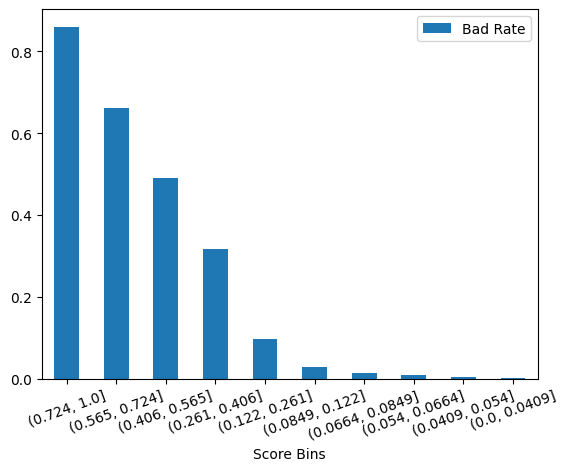

In [ ]:
# Rank Ordering
quantiles = list(set(train.Prediction.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
quantiles.sort()
quantiles.insert(0,0)
quantiles.insert(len(quantiles),1)


train["Score Bins"] = pd.cut(train["Prediction"], quantiles)
stat = train.groupby("Score Bins")["target"].agg(["sum", "count"])
stat["Bad Rate"] = stat["sum"] / stat["count"]
stat.sort_values(["Bad Rate"],ascending=False, inplace=True)


stat.plot.bar(y='Bad Rate', rot=20)

In [ ]:
test1["Prediction"] = model_final.predict(X_test1)

test1["Score Bins"] = pd.cut(test1["Prediction"], quantiles)
stat = test1.groupby("Score Bins")["target"].agg(["sum", "count"])
stat["Bad Rate"] = stat["sum"] / stat["count"]
stat.sort_values(["Bad Rate"],ascending=False, inplace=True)

stat.plot.bar(y='Bad Rate', rot=20)

In [ ]:
test2["Prediction"] = model_final.predict(X_test2)

test2["Score Bins"] = pd.cut(test2["Prediction"], quantiles)
stat = test2.groupby("Score Bins")["target"].agg(["sum", "count"])
stat["Bad Rate"] = stat["sum"] / stat["count"]
stat.sort_values(["Bad Rate"],ascending=False, inplace=True)

stat.plot.bar(y='Bad Rate', rot=20)